# Logistic Regression Analysis

### Libraries

We utilize both external libraries, like numpy and scikit-learn, as well as internally written libraries for the sake of modularity and simplicity of code within this notebook. The goal for modularizing the code base is so that running the different algorithms here can be clean and require as few parameters and extraneous code blocks as possible, enabling us to focus on analysis.

In [10]:
# External libraries:
import numpy as np
from sklearn.model_selection import train_test_split

# Internal libraries:
import datasets.data as data
from descent_algorithms import *
from learning_rates import *
from models import *
from util import *

### Data
We use three different datasets for our analysis of our algorithms, all of which provide a binary classification problem (??? 0 or 1 ???). (DESCRIPTION OF THREE DATASETS HERE AND HOW THEY ARE PREPPED IN THE data.py FILE)

Here, we read in the data vectors and labels using the datasets/data utility functions, and then perform a train/test split of 80%/20% of the provided samples. The splitting is done using the train_test_split function from the sklearn.model_selection package, which randomizes the splits.

In [11]:
features, labels = data.load_wisconsin_breast_cancer()
wbc_X_train, wbc_X_test, wbc_y_train, wbc_y_test = train_test_split(
    features, labels, test_size=0.2)
wbc_n = wbc_X_train.shape[0]

M_features, M_labels = data.load_MNIST_13()
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(
    M_features, M_labels, test_size = 0.2)
mnist_n = mnist_X_train.shape[0]

cod_features, cod_labels = data.load_cod_rna()
cod_X_train, cod_X_test, cod_y_train, cod_y_test = train_test_split(
    cod_features, cod_labels, test_size = 0.2)
cod_n = cod_X_train.shape[0]

### Comparative Measures
We use a relative convergence measure of 0.000001 (1/10000% change in loss between iterations), in order to determine whether or not an algorithm has converged. This allows us to directly compare the various descent methods and learning rates (?? and regularizations ??) for convergence rate.

Additionally, we keep track of the final loss converged too, the resultant test accuracy, and the time per iteration in order to fully compare the relative performance of the all of the algorithms.

In [12]:
# relative convergence limit
rel_conv = 0.000001

### Fixed Learning Rate
We begin our analysis with a look at the fixed learning rate convergence for our GD, SGD, AGD, and SVRG algorithms on our three datasets.

The default learning rate for fixed is set to 0.01.

In [13]:
# initialize our learning rate object
lr = FixedRate()

#### Wisconsin Breast Cancer Data
Then, we setup the run for all of our descent methods on the Wisconsin Breast Cancer dataset, beginning with the initialization of each of our descent method objects.

In [14]:
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent() # the GD algorithm is used for all SGD algorithms, 
                          # with the smaller batch size specified in the model
sgd_10 = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrg = StochasticVarianceReducedGradientDescent()
md = MirrorDescent()

Next, we initialize all of our model objects (all logistic regression models in this case), with the appropriate parameters for each algorithm.

In [15]:
# LogisticRegression(DescentAlgorithm, LearningRate, max iterations, 
# batch size, relative convergence)
gd_log = LogisticRegression(gd, lr, 5000, wbc_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr, 2000, 1, rel_conv)
sgd_10_log = LogisticRegression(sgd_10, lr, 4000, 10, rel_conv)
sgd_100_log = LogisticRegression(sgd_100, lr, 4000, 100, rel_conv)
agd_log = LogisticRegression(agd, lr, 400, wbc_n, rel_conv)
svrg_log = LogisticRegression(svrg, lr, 20, wbc_n, rel_conv)
md_log = LogisticRegression(md, lr, 2000, wbc_n, rel_conv)

Then, we run the fit for each model:

In [16]:
print('Fitting gradient descent:')
wbc_gd_loss = gd_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
wbc_sgd_1_loss = sgd_1_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 10:')
wbc_sgd_10_loss = sgd_10_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 100:')
wbc_sgd_100_loss = sgd_100_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting accelerated gradient descent:')
wbc_agd_loss = agd_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic variance reduced gradient descent:')
wbc_svrg_loss = svrg_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting mirror descent:')
wbc_md_loss = md_log.fit(wbc_X_train, wbc_y_train)

Fitting gradient descent:
Iter:        0 train loss: 374.647
Iter:      500 train loss: 225.516
Iter:     1000 train loss: 217.468
Iter:     1500 train loss: 215.236
Iter:     2000 train loss: 214.363
Iter:     2500 train loss: 213.963
Iter:     3000 train loss: 213.764
Converged in 3209 iterations.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 402.252
Iter:      200 train loss: 270.077
Iter:      400 train loss: 287.149
Iter:      600 train loss: 268.861
Iter:      800 train loss: 239.129
Iter:     1000 train loss: 273.903
Iter:     1200 train loss: 217.920
Iter:     1400 train loss: 224.019
Converged in 1487 iterations.

Fitting stochastic gradient descent, batch size = 10:
Iter:        0 train loss: 375.828
Iter:      400 train loss: 230.196
Iter:      800 train loss: 220.779
Converged in 1111 iterations.

Fitting stochastic gradient descent, batch size = 100:
Iter:        0 train loss: 373.762
Converged in 306 iterations.

Fitting accelerated grad

In [17]:
acc = check_accuracy(gd_log, wbc_X_test, wbc_y_test)
print("GD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, wbc_X_test, wbc_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_10_log, wbc_X_test, wbc_y_test)
print("SGD 10 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_100_log, wbc_X_test, wbc_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(agd_log, wbc_X_test, wbc_y_test)
print("AGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(svrg_log, wbc_X_test, wbc_y_test)
print("SVRG Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))

GD Accuracy: 86.43%
SGD 1 Accuracy: 86.43%
SGD 10 Accuracy: 87.14%
SGD 100 Accuracy: 84.29%
AGD Accuracy: 86.43%
SVRG Accuracy: 86.43%
MD Accuracy: 86.43%


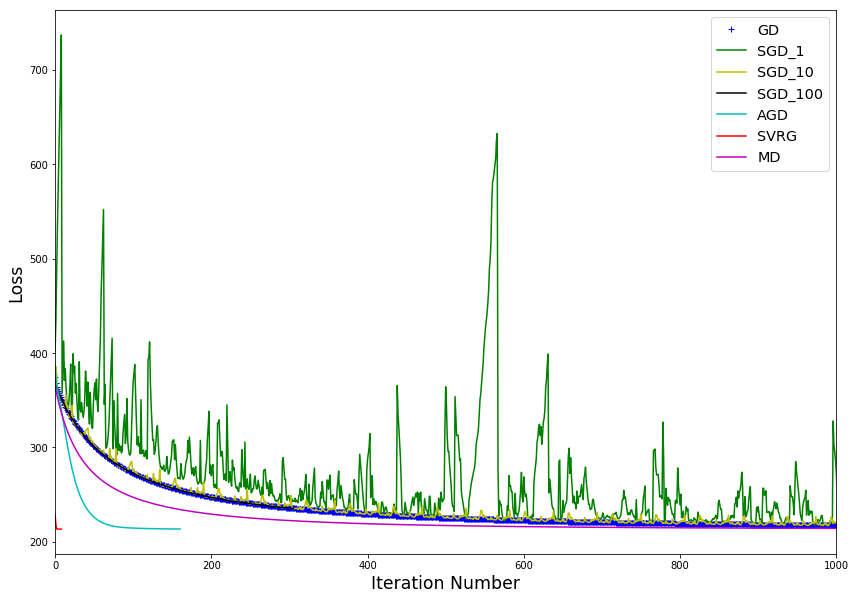

In [18]:
plot_fixed_losses(wbc_gd_loss, wbc_sgd_1_loss, wbc_sgd_10_loss, wbc_sgd_100_loss, wbc_agd_loss, wbc_svrg_loss, wbc_md_loss)

#### MNIST Data
Then, we setup the run for all of our descent methods on the MNIST dataset, beginning with the initialization of each of our descent method objects. We combine the cells here and reduce the footprint, as the usage is the same as above.

In [ ]:
lr = FixedRate(0.000001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent() 
sgd_10 = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrg = StochasticVarianceReducedGradientDescent()
md = MirrorDescent()
# initialize the logisitic regression objects
gd_log = LogisticRegression(gd, lr, 5000, mnist_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr, 5000, 1, rel_conv)
sgd_10_log = LogisticRegression(sgd_10, lr, 5000, 10, rel_conv)
sgd_100_log = LogisticRegression(sgd_100, lr, 5000, 100, rel_conv)
agd_log = LogisticRegression(agd, lr, 2000, mnist_n, rel_conv)
svrg_log = LogisticRegression(svrg, lr, 40, mnist_n, rel_conv)
md_log = LogisticRegression(md, lr, 3000, mnist_n, rel_conv)
# and run the fit for each of these models, this time on the MNIST data set:
print('Fitting gradient descent:')
mnist_gd_loss = gd_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
mnist_sgd_1_loss = sgd_1_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting stochastic gradient descent, batch size = 10:')
mnist_sgd_10_loss = sgd_10_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting stochastic gradient descent, batch size = 100:')
mnist_sgd_100_loss = sgd_100_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting accelerated gradient descent:')
mnist_agd_loss = agd_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting stochastic variance reduced gradient descent:')
mnist_svrg_loss = svrg_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting mirror descent:')
mnist_md_loss = md_log.fit(mnist_X_train, mnist_y_train)
# displaying accuracies
acc = check_accuracy(gd_log, mnist_X_test, mnist_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, mnist_X_test, mnist_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_10_log, mnist_X_test, mnist_y_test)
print("SGD 10 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_100_log, mnist_X_test, mnist_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(agd_log, mnist_X_test, mnist_y_test)
print("AGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(svrg_log, mnist_X_test, mnist_y_test)
print("SVRG Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, mnist_X_test, mnist_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot losses
plot_losses(mnist_gd_loss, mnist_sgd_1_loss, mnist_sgd_10_loss, 
            mnist_sgd_100_loss, mnist_agd_loss, mnist_svrg_loss, 
            mnist_md_loss)

#### COD-RNA Data
Lastly, we setup the run for all of our descent methods on the COD-RNA dataset, again using a reduced-frill cell to run our fit for each method's model.

In [22]:
lr = FixedRate(0.00001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
sgd_10 = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrg = StochasticVarianceReducedGradientDescent()
md = MirrorDescent()
# initialize the logisitic regression objects
gd_log = LogisticRegression(gd, lr, 5000, cod_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr, 4000, 1, rel_conv)
sgd_10_log = LogisticRegression(sgd_10, lr, 4000, 10, rel_conv)
sgd_100_log = LogisticRegression(sgd_100, lr, 4000, 100, rel_conv)
agd_log = LogisticRegression(agd, lr, 200, cod_n, rel_conv)
svrg_log = LogisticRegression(svrg, lr, 20, cod_n, rel_conv)
md_log = LogisticRegression(md, lr, 2000, cod_n, rel_conv)
# and run the fit for each of these models, this time on the MNIST data set:
print('Fitting gradient descent:')
cod_gd_loss = gd_log.fit(cod_X_train, cod_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
cod_sgd_1_loss = sgd_1_log.fit(cod_X_train, cod_y_train)
print('\nFitting stochastic gradient descent, batch size = 10:')
cod_sgd_10_loss = sgd_10_log.fit(cod_X_train, cod_y_train)
print('\nFitting stochastic gradient descent, batch size = 100:')
cod_sgd_100_loss = sgd_100_log.fit(cod_X_train, cod_y_train)
print('\nFitting accelerated gradient descent:')
cod_agd_loss = agd_log.fit(cod_X_train, cod_y_train)
print('\nFitting stochastic variance reduced gradient descent:')
cod_svrg_loss = svrg_log.fit(cod_X_train, cod_y_train)
print('\nFitting stochastic variance reduced gradient descent:')
cod_md_loss = md_log.fit(cod_X_train, cod_y_train)
# displaying accuracies
acc = check_accuracy(gd_log, cod_X_test, cod_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, cod_X_test, cod_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_10_log, cod_X_test, cod_y_test)
print("SGD 10 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_100_log, cod_X_test, cod_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(agd_log, cod_X_test, cod_y_test)
print("AGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(svrg_log, cod_X_test, cod_y_test)
print("SVRG Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, cod_X_test, cod_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot losses
plot_fixed_losses(cod_gd_loss, cod_sgd_1_loss, cod_sgd_10_loss, 
            cod_sgd_100_loss, cod_agd_loss, cod_svrg_loss, 
            cod_md_loss)

Fitting gradient descent:
Iter:        0 train loss: 32604.303
Iter:      500 train loss: 21174.852
Iter:     1000 train loss: 18245.741
Iter:     1500 train loss: 17038.379
Iter:     2000 train loss: 16419.924
Iter:     2500 train loss: 16063.161
Iter:     3000 train loss: 15841.507
Iter:     3500 train loss: 15696.674
Iter:     4000 train loss: 15598.542
Iter:     4500 train loss: 15530.219

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 34109.522
Iter:      400 train loss: 35090.729
Iter:      800 train loss: 21667.541
Iter:     1200 train loss: 25934.990
Iter:     1600 train loss: 20191.505
Iter:     2000 train loss: 28493.593
Iter:     2400 train loss: 30357.458
Iter:     2800 train loss: 19022.274
Iter:     3200 train loss: 19728.984
Converged in 3262 iterations.

Fitting stochastic gradient descent, batch size = 10:
Iter:        0 train loss: 35604.298
Iter:      400 train loss: 22427.306
Iter:      800 train loss: 19921.603
Iter:     1200 train 

NameError: name 'plot_losses' is not defined

### Polynomial Decaying Learning Rate
We begin our analysis with a look at the polynomial decaying learning rate convergence for our GD, SGD, AGD, and SVRG algorithms on our three datasets.

The default learning rate for fixed is set to 0.01, and a gamma value of 0.0001.

#### Wisconsin Breast Cancer Data
Then, we setup the run for all of our descent methods on the Wisconsin Breast Cancer dataset, beginning with the initialization of each of our descent method objects.

In [ ]:
# initialize our learning rate object
lr_gd = PolyDecayRate(0.1, 0.0001)
lr_sgd = PolyDecayRate(0.01, 0.00001)
lr_md = PolyDecayRate(0.1, 0.00001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
md = MirrorDescent()
# initialize logistic regression models
gd_log = LogisticRegression(gd, lr_gd, 2000, wbc_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr_sgd, 2000, 1, rel_conv)
md_log = LogisticRegression(md, lr_md, 2000, wbc_n, rel_conv)
# fit the models...
print('Fitting gradient descent:')
wbc_gd_loss = gd_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
wbc_sgd_1_loss = sgd_1_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting mirror descent:')
wbc_md_loss = md_log.fit(wbc_X_train, wbc_y_train)
# print the test accuracies for each model
acc = check_accuracy(gd_log, wbc_X_test, wbc_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, wbc_X_test, wbc_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot the loss convergences for each model
plot_dynamic_losses(wbc_gd_loss, wbc_sgd_1_loss, wbc_md_loss)

In [ ]:
# initialize our learning rate object
lr_gd = PolyDecayRate(0.01, 0.0001)
lr_sgd = PolyDecayRate(0.01, 0.00001)
lr_md = PolyDecayRate(0.1, 0.00001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
md = MirrorDescent()
# initialize logistic regression models
gd_log = LogisticRegression(gd, lr_gd, 2000, mnist_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr_sgd, 2000, 1, rel_conv)
md_log = LogisticRegression(md, lr_md, 2000, mnist_n, rel_conv)
# fit the models...
print('Fitting gradient descent:')
mnist_gd_loss = gd_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
mnist_sgd_1_loss = sgd_1_log.fit(mnist_X_train, mnist_y_train)
print('\nFitting mirror descent:')
mnist_md_loss = md_log.fit(mnist_X_train, mnist_y_train)
# print the test accuracies for each model
acc = check_accuracy(gd_log, mnist_X_test, mnist_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, mnist_X_test, mnist_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, mnist_X_test, mnist_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot the loss convergences for each model
plot_dynamic_losses(mnist_gd_loss, mnist_sgd_1_loss, mnist_md_loss)

#### COD-RNA Data
Lastly, we setup the run for all of our descent methods on the COD-RNA dataset, again using a reduced-frill cell to run our fit for each method's model.

Fitting gradient descent:
Iter:        0 train loss: 41988.278
Iter:      200 train loss: 16423.370
Converged in 356 iterations.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 39660.959
Iter:      200 train loss: 27906.478
Iter:      400 train loss: 25002.326
Iter:      600 train loss: 24289.977
Iter:      800 train loss: 23190.332
Converged in 940 iterations.

Fitting mirror descent:
Iter:        0 train loss: 67243.936
Iter:      200 train loss: 17039.946
Iter:      400 train loss: 16767.916
Converged in 548 iterations.


GD Accuracy: 87.60%
SGD 1 Accuracy: 86.05%
MD Accuracy: 87.83%


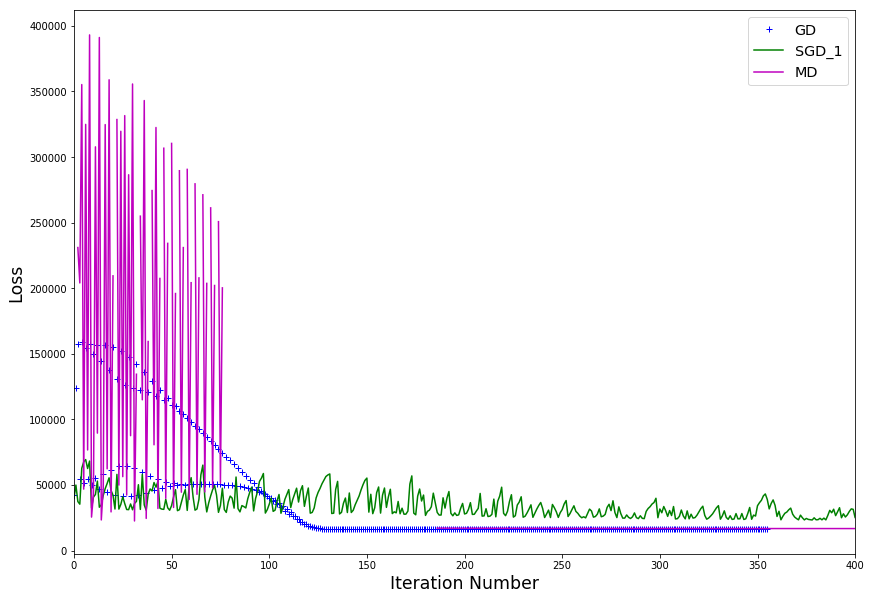

In [28]:
# initialize our learning rate object
lr_gd = PolyDecayRate(0.0001, 0.0001)
lr_sgd = PolyDecayRate(0.00001, 0.00001)
lr_md = PolyDecayRate(0.0001, 0.00001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
md = MirrorDescent()
# initialize logistic regression models
gd_log = LogisticRegression(gd, lr_gd, 1000, cod_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr_sgd, 1500, 1, rel_conv)
md_log = LogisticRegression(md, lr_md, 1000, cod_n, rel_conv)
# fit the models...
print('Fitting gradient descent:')
cod_gd_loss = gd_log.fit(cod_X_train, cod_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
cod_sgd_1_loss = sgd_1_log.fit(cod_X_train, cod_y_train)
print('\nFitting mirror descent:')
cod_md_loss = md_log.fit(cod_X_train, cod_y_train)
# print the test accuracies for each model
acc = check_accuracy(gd_log, cod_X_test, cod_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, cod_X_test, cod_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, cod_X_test, cod_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot the loss convergences for each model
plot_dynamic_losses(cod_gd_loss, cod_sgd_1_loss, cod_md_loss)

### Exponential Decaying Learning Rate
Lastly, we analyze an exponentially decaying learning rate for convergence for our GD, SGD, AGD, and SVRG algorithms on our three datasets.

The default learning rate for fixed is set to 0.01, and a gamma value of 0.0001.

#### Wisconsin Breast Cancer Data
Then, we setup the run for all of our descent methods on the Wisconsin Breast Cancer dataset, beginning with the initialization of each of our descent method objects.

In [ ]:
# initialize our learning rate object
lr_gd = ExpDecayRate(0.1, 0.001)
lr_sgd = ExpDecayRate(0.01, 0.001)
lr_md = ExpDecayRate(0.1, 0.001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
md = MirrorDescent()
# initialize logistic regression models
gd_log = LogisticRegression(gd, lr_gd, 2000, wbc_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr_sgd, 2000, 1, rel_conv)
md_log = LogisticRegression(md, lr_md, 2000, wbc_n, rel_conv)
# fit the models...
print('Fitting gradient descent:')
wbc_gd_loss = gd_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
wbc_sgd_1_loss = sgd_1_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting mirror descent:')
wbc_md_loss = md_log.fit(wbc_X_train, wbc_y_train)
# print the test accuracies for each model
acc = check_accuracy(gd_log, wbc_X_test, wbc_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, wbc_X_test, wbc_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot the loss convergences for each model
plot_dynamic_losses(wbc_gd_loss, wbc_sgd_1_loss, wbc_md_loss)

Fitting gradient descent:
Iter:        0 train loss: 41988.278
Iter:      200 train loss: 32723.942
Iter:      400 train loss: 15378.542
Iter:      600 train loss: 15363.520
Iter:      800 train loss: 15355.727
Iter:     1000 train loss: 15351.374
Converged in 1028 iterations.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 36986.705
Iter:      400 train loss: 38805.746
Iter:      800 train loss: 21007.069
Iter:     1200 train loss: 20388.093
Iter:     1600 train loss: 19552.604
Iter:     2000 train loss: 18919.934
Iter:     2400 train loss: 18711.812
Converged in 2561 iterations.

Fitting mirror descent:
Iter:        0 train loss: 67215.800
Iter:      400 train loss: nan
Iter:      800 train loss: 16538.694
Iter:     1200 train loss: 16238.132
Iter:     1600 train loss: 16122.571
Iter:     2000 train loss: 16074.406
Iter:     2400 train loss: 16053.504
Converged in 2768 iterations.


GD Accuracy: 87.78%
SGD 1 Accuracy: 87.10%
MD Accuracy: 87.80%


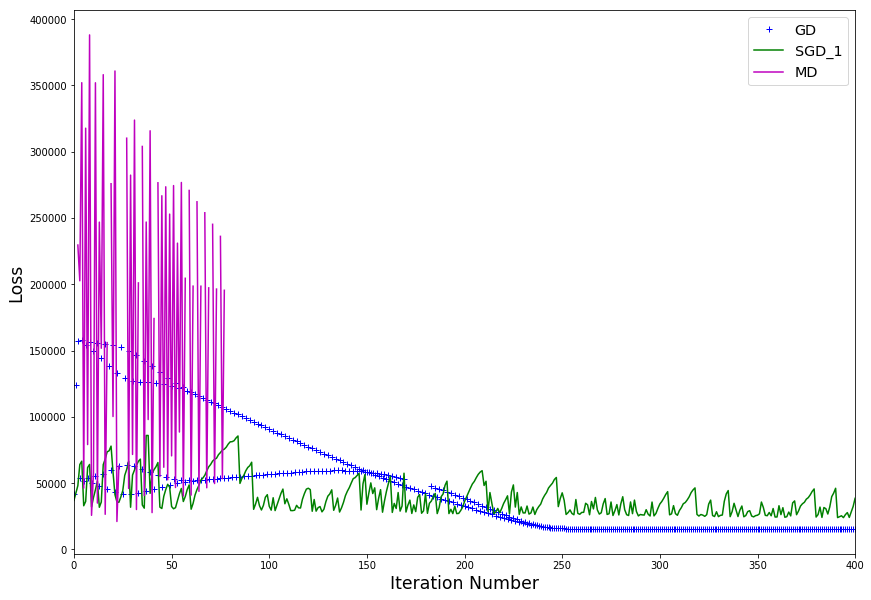

In [31]:
# initialize our learning rate object
lr_gd = ExpDecayRate(0.0001, 0.001)
lr_sgd = ExpDecayRate(0.00001, 0.001)
lr_md = ExpDecayRate(0.0001, 0.001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
md = MirrorDescent()
# initialize logistic regression models
gd_log = LogisticRegression(gd, lr_gd, 2000, cod_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr_sgd, 4000, 1, rel_conv)
md_log = LogisticRegression(md, lr_md, 4000, cod_n, rel_conv)
# fit the models...
print('Fitting gradient descent:')
wbc_gd_loss = gd_log.fit(cod_X_train, cod_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
wbc_sgd_1_loss = sgd_1_log.fit(cod_X_train, cod_y_train)
print('\nFitting mirror descent:')
wbc_md_loss = md_log.fit(cod_X_train, cod_y_train)
# print the test accuracies for each model
acc = check_accuracy(gd_log, cod_X_test, cod_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, cod_X_test, cod_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, cod_X_test, cod_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot the loss convergences for each model
plot_dynamic_losses(wbc_gd_loss, wbc_sgd_1_loss, wbc_md_loss)

Run notes:

FIRST:
lr:
    - fixed: GD(0.01), SGD(0.01) - batched at 1,10,100 , SVRG(0.01), Nest(0.01)
    - polydecay: GD(0.01, 0.0001), SGD(0.01, 0.00001) - batched, SVRG(N/A), Nest(N/A)
    - expdecay: GD(0.1,0.001), SGD(0.1,.001) - batched, SVRG(N/A), Nest(N/A)